Imagine a rocket is resting stationary in intergalatic space, subjected to no gravity at all. Due to (many simultaneous) software malfunction(s) one of the thrusters on the side of the rocket turns on, and stays on.

This gives the rocket angular momentum as well as linear momentum, so it gets pushed to one side and then starts spinning too. 

The faster it spins, the faster the thrusters change direction, so the direction of the boost changes more and more frequently.

What kind of trajectory will it draw out if the astronauts never manage to turn it off before they blackout from the centripedal force?

Let's ignore the fact that we live in a 3 dimensional world (and therefore the implications of the [tennis racket theorem](https://en.wikipedia.org/wiki/Tennis_racket_theorem), and assume that this problem only cause the rocket to spin in a single plane.

The key to solving this problem is to realize that, the angular speed of the rocket is a linear function of time: the longer it stay out of control, the faster it spins.

Therefore the angular speed at any one point is $\propto t$.

The acceleration vector $\vec{a}$ is a vector of constant magnitude, whose direction rotates faster and faster. 

The velocity vector of the rocket is obtained by integrating the acceleration vector $\vec{a}$ wrt. time.

\begin{equation}
v_x = S(t)
\end{equation}
\begin{equation}
v_y = C(t)
\end{equation}

Where S and C are the [Fresnel integrals](https://en.wikipedia.org/wiki/Fresnel_integral). 

We can then obtain the displacement vector by integrating wrt. time again.

The Fresnel integrals:

S:
![title](sin_fresnel.png)

C:
![title](cos_fresnel.png)

In [1]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import scipy.special as spc
import scipy.integrate as inte
import scipy.constants as k

In [16]:
time_steps = 1001 # number of time steps to integrate over
t = np.linspace(0,10,time_steps)
c = (np.sqrt(k.pi/2)) # correction factor for the fresnel functions

# CHANGE CONSTNATS HERE
FM = 3 # Acceleration exerted by the nozzle, i.e.
# The ratio of (Mass of rocket):(force exerted by the ejected gas onto the nozzle)
# (in m/s2)

R_K = 1 # The radius of gyration of the rocket
# END OF USER-DEFINED CONSTANTS SECTION

R2K = R_K/2
u = np.sqrt(FM*R2K)
cu= c/u # constants
l = cu*FM # more constants

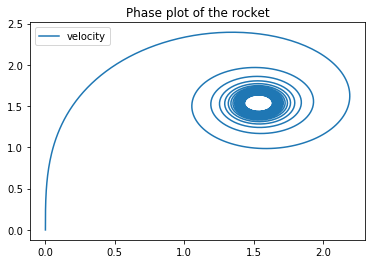

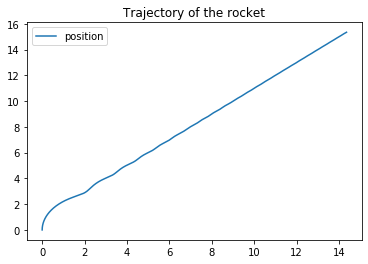

In [17]:
vi = spc.fresnel(t/cu)
vx = l*vi[0] # the x-component of the velocity time series
vy = l*vi[1] # the y-component of the velocity time series

# create function to integrate the velocity over
velox = lambda x : spc.fresnel(x)[0]
veloy = lambda x : spc.fresnel(x)[1]

# calculate the positions by integration
x, y = [], []
for i in range (0, time_steps):
    xi = inte.quad(velox, 0, t[i]/cu)[0] # only the first element of the resulting tuple is the integration result
    x.append( l*cu*xi )
    yi = inte.quad(veloy, 0, t[i]/cu)[0]
    y.append( l*cu*yi )
    
velocity, = plt.plot(vx, vy, label='velocity')
plt.title('Phase plot of the rocket')
plt.legend()
plt.show()

position, = plt.plot(x, y, label='position')
plt.title('Trajectory of the rocket')
plt.legend()
plt.show()

Side note: the rocket's velocity trace forms what is called an [Euler spirl](https://en.wikipedia.org/wiki/Euler_spiral).

Exercise for the reader:
What do you think the graph would look like if we add gravity back into the picture? I.e. if this whole imaginary accident happened while it is closed to the surface, during a launch.

In [ ]:
# run the code below to find out!
g = 0.62 # m s^{-2} # Let's say we're launching from Pluto's surface

vi = spc.fresnel(t/cu)
vx = l*vi[0]
vy = l*vi[1]-g*t

# create function to integrate the velocity over
velox = lambda x : spc.fresnel(x)[0]
veloy = lambda x : spc.fresnel(x)[1]

# calculate the positions by integration
x, y = [], []
for i in range (0, time_steps):
    xi = inte.quad(velox, 0, t[i]/cu)[0] # only the first element of the resulting tuple is the integration result
    x.append( l*cu*xi )
    yi = inte.quad(veloy, 0, t[i]/cu)[0]
    y.append( l*cu*yi )
    
velocity, = plt.plot(vx, vy, label='velocity')
plt.title('Phase plot of the rocket')
plt.legend()
plt.show()

position, = plt.plot(x, y, label='position')
plt.title('Trajectory of the rocket')
plt.legend()
plt.show()